## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier



## **Mount with google drive to fetch all documents in the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading and Initializing the Dataset and showing all information related to dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/balanced_dataset.csv')

print(df.head())
print(df.info())
print(df.describe())


   Gender  Age  Work Pressure  Job Satisfaction     Sleep Duration  \
0    Male   49              1                 5  More than 8 hours   
1  Female   27              4                 5  More than 8 hours   
2    Male   23              3                 3          7-8 hours   
3  Female   41              5                 5  More than 8 hours   
4  Female   18              1                 1          5-6 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Work Hours  \
0      Unhealthy                                   Yes           6   
1      Unhealthy                                   Yes          10   
2        Healthy                                   Yes           9   
3        Healthy                                    No           0   
4        Healthy                                   Yes           7   

   Financial Stress Family History of Mental Illness Depression  
0                 3                              Yes         No  
1                 2       

## **Data Cleaning and Encoding(converting all string data into values) and Finally check the missing values**

In [4]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

# Encode Sleep Duration
df['Sleep Duration'] = df['Sleep Duration'].map({'7-8 hours': 3, 'More than 8 hours': 4, '5-6 hours': 2, 'Less than 5 hours': 1})

# Encode Dietary Habits
df['Dietary Habits'] = df['Dietary Habits'].map({'Healthy': 1, 'Moderate': 0, 'Unhealthy': -1})

# Encode Suicidal Thoughts
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

# Encode Family History of Mental Illness
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Encode Depression
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})

# Check for missing values
print(df.isnull().sum())


Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


# **Showing each column for check all class in every column in the dataset which indicates dataset balance or not**

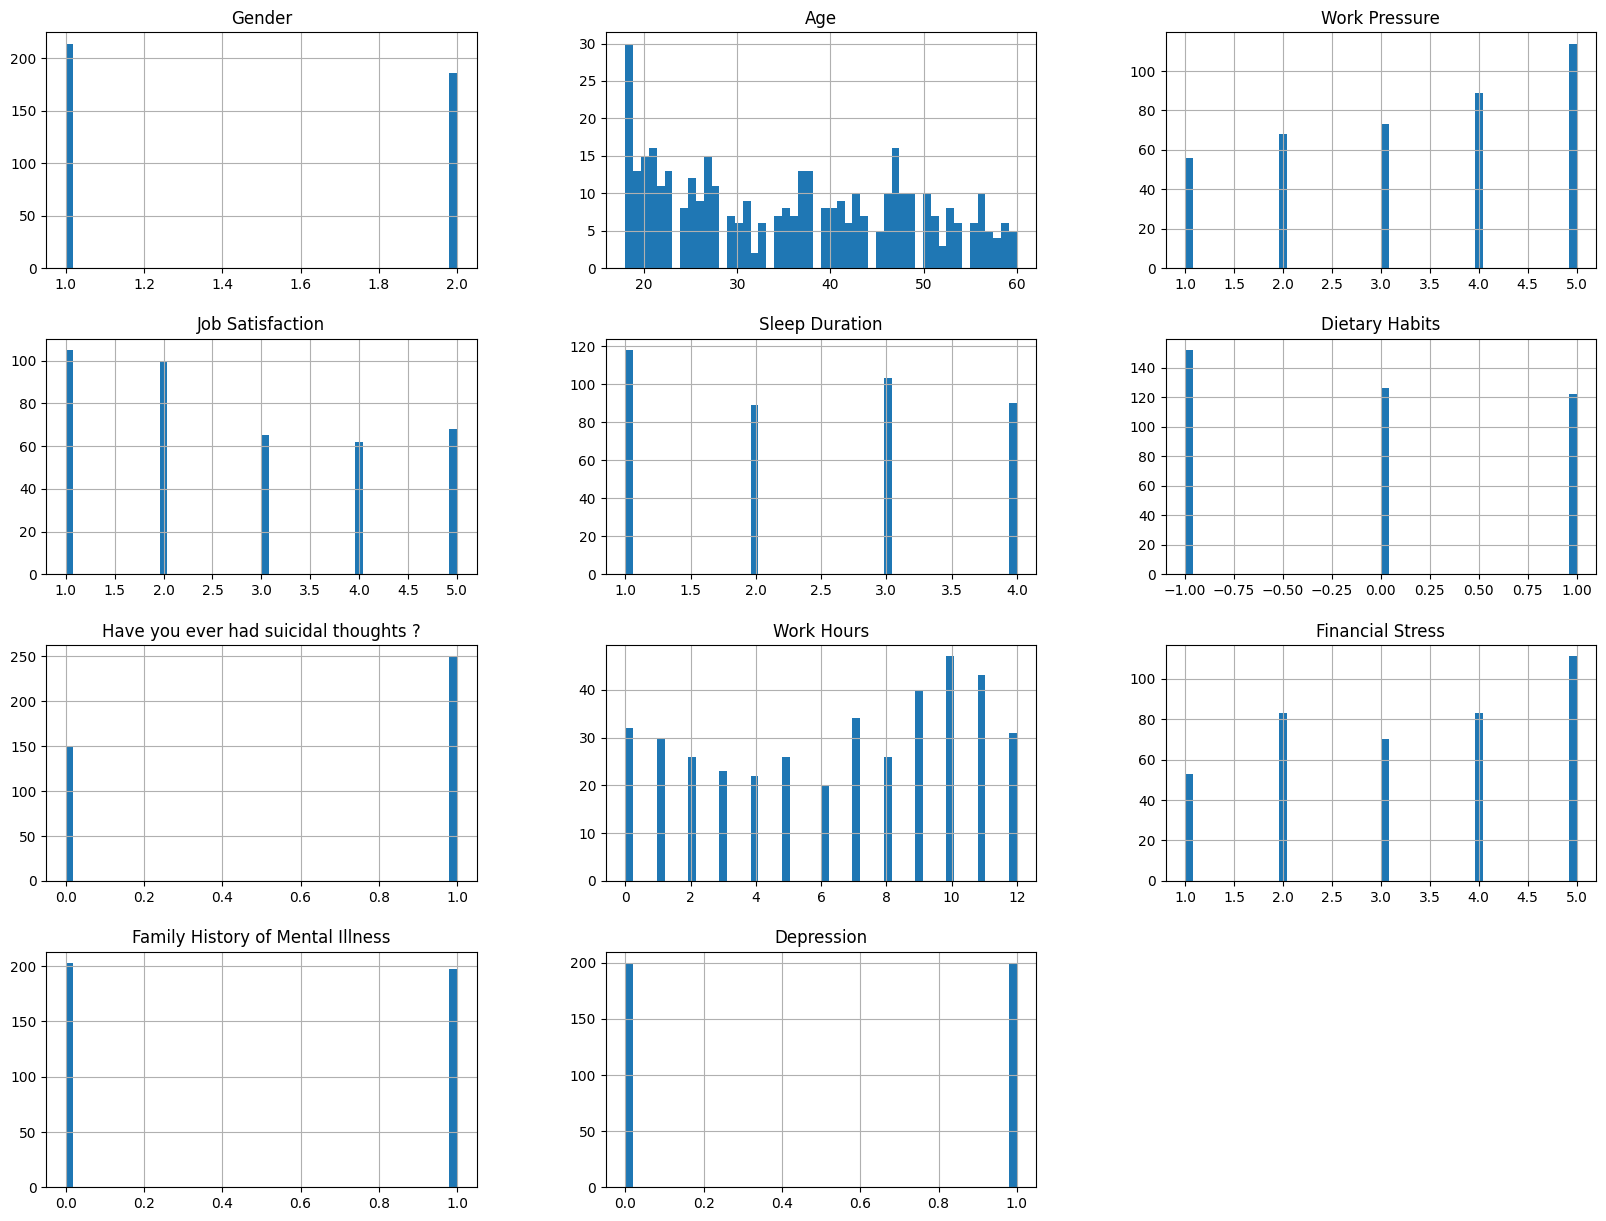

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## **Pairplot: Pairplot shows the visual correlation between columns**

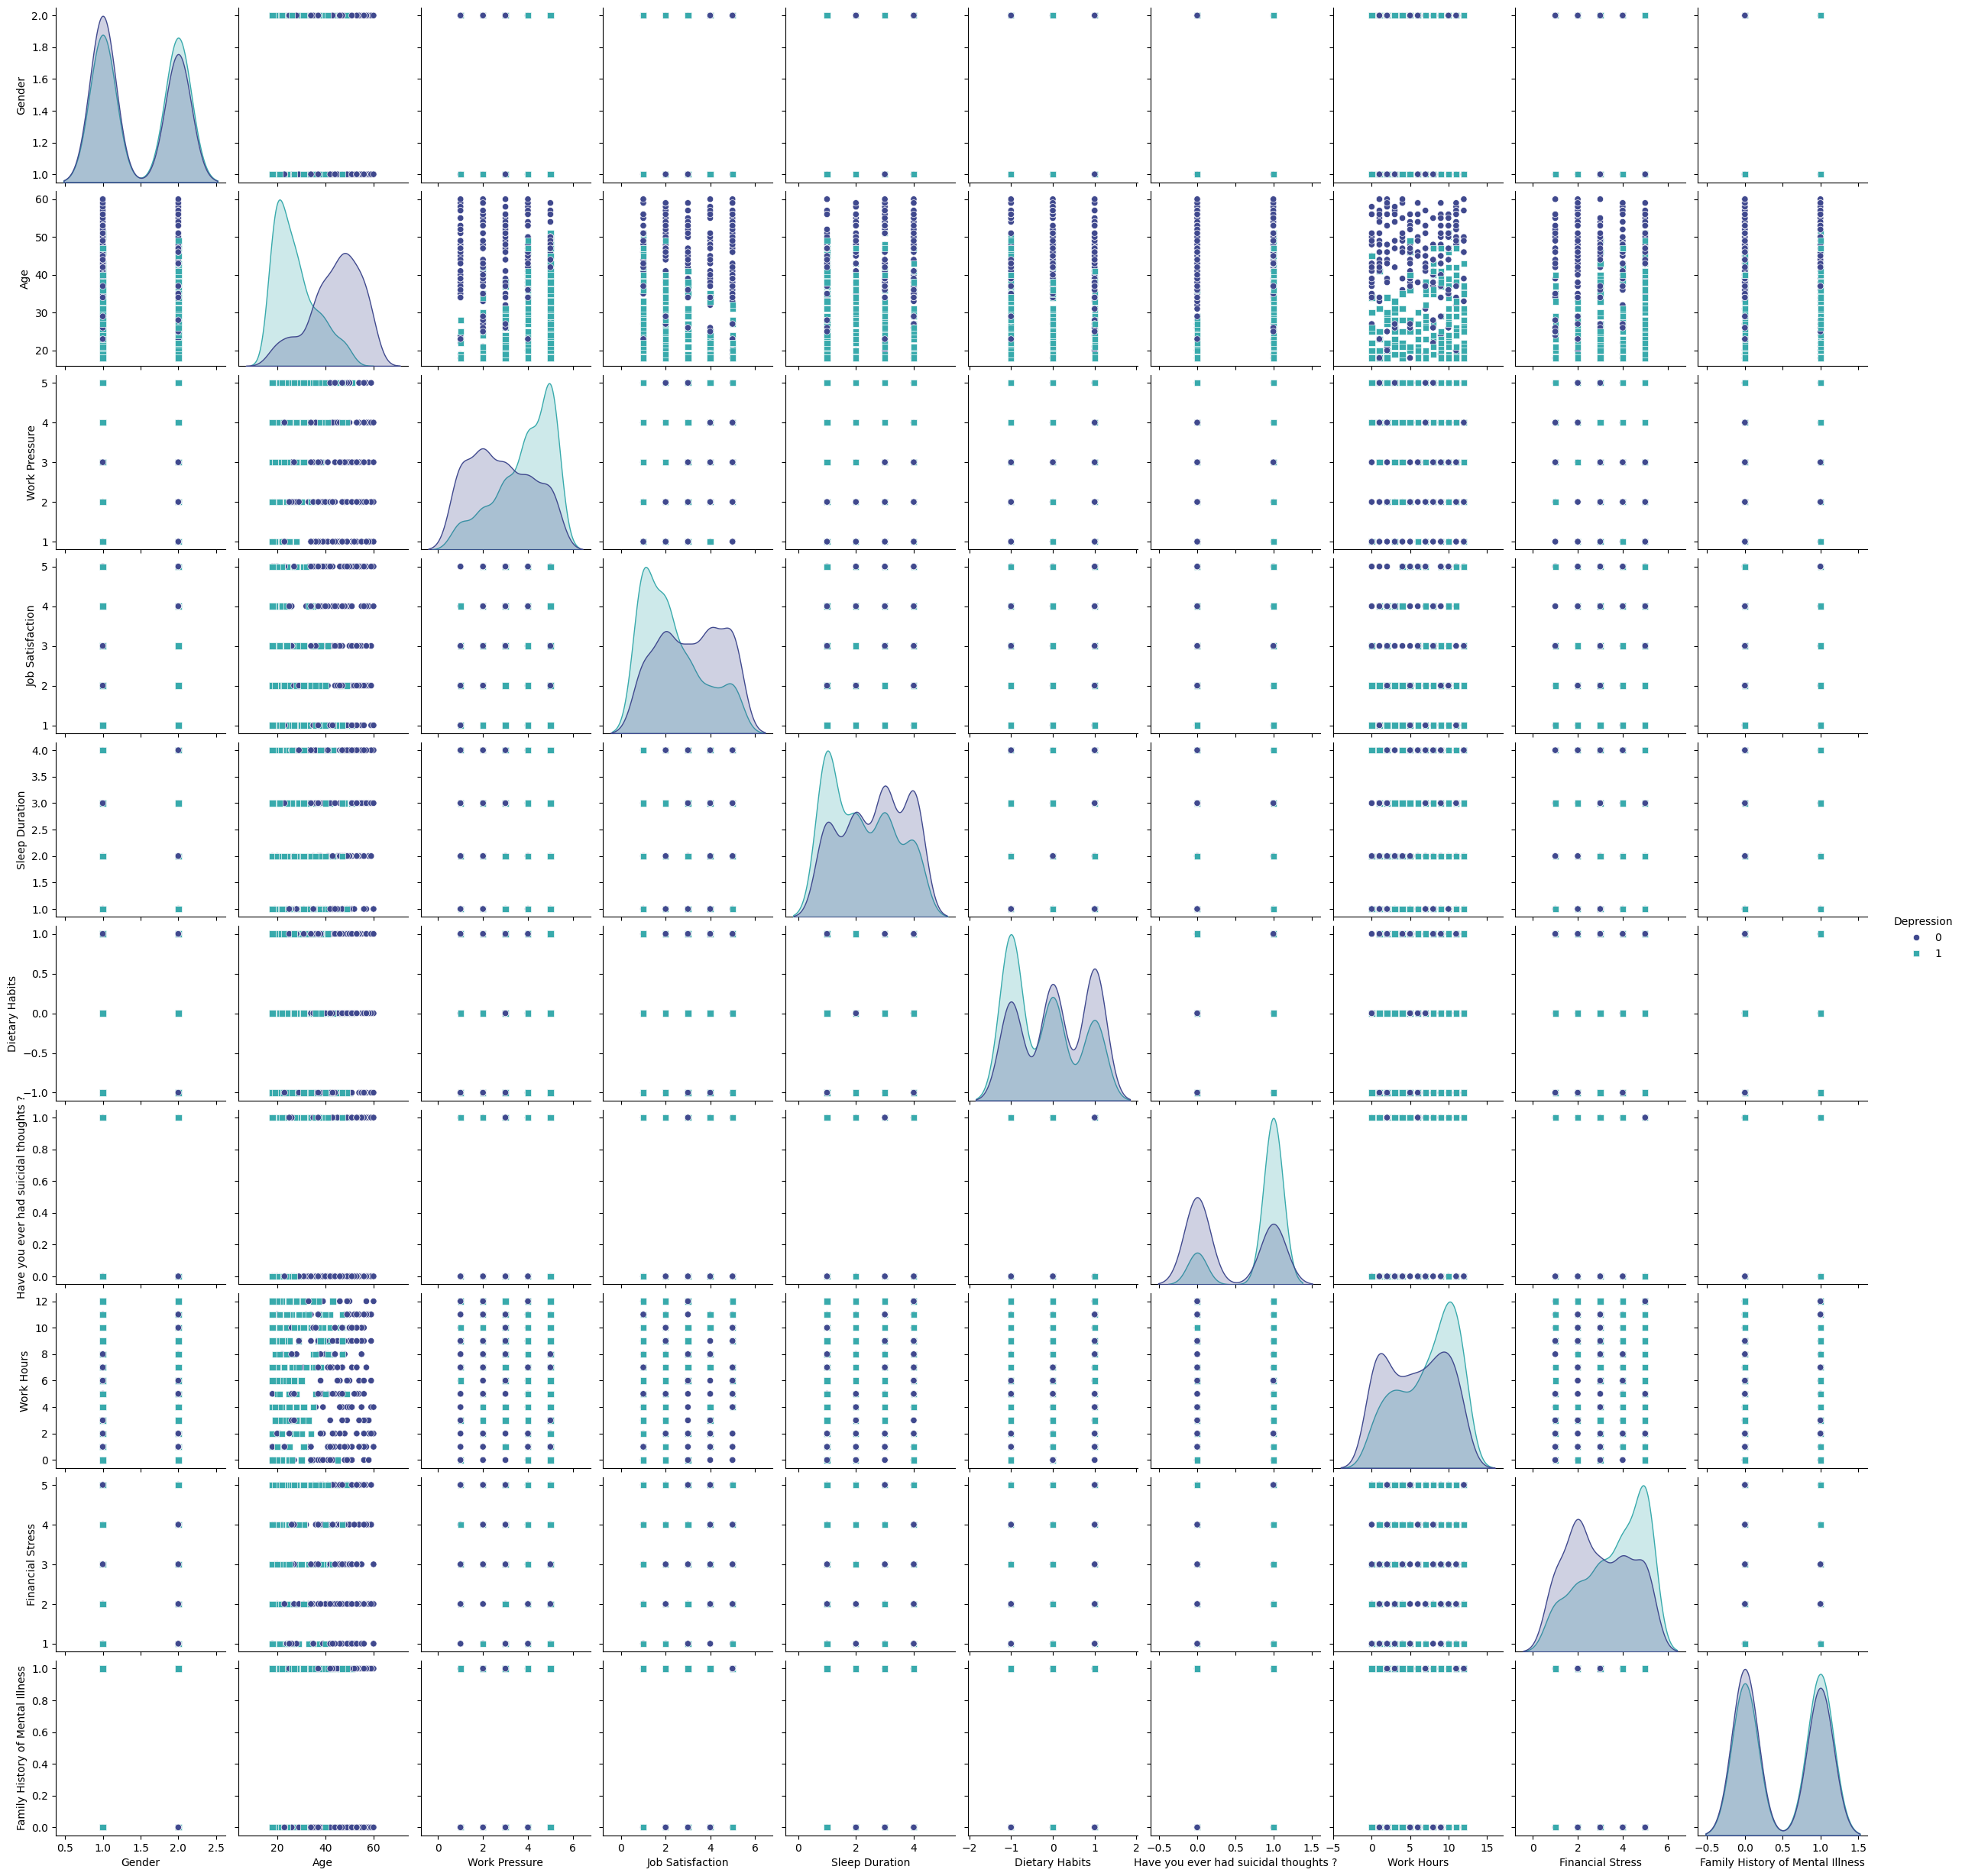

In [6]:
sns.pairplot(df, hue="Depression", diag_kind="kde", palette="mako", markers=["o", "s"])

 **Splitting Dataset into Train, Test, and Validation**

>


In [7]:
# Separate features and target
x = df.drop(['Depression'], axis=1)
y = df['Depression']

# Split into train, test, and validation sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42,stratify=y_temp)

print(f"Training set: {x_train.shape}, Testing set: {x_test.shape}, Validation set: {x_valid.shape}")


Training set: (280, 10), Testing set: (80, 10), Validation set: (40, 10)


## **Initialize Models**

In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(max_iter=100)
}


## **Train and Evaluate Models**

In [9]:
results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
results_test = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
results_valid = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

In [10]:
for name, model in models.items():
    try:
        model.fit(x_train, y_train)

        # Training evaluation
        y_train_pred = model.predict(x_train)
        results_train['Model'].append(name)
        results_train['Accuracy'].append(accuracy_score(y_train, y_train_pred))
        results_train['Precision'].append(precision_score(y_train, y_train_pred, average='weighted', zero_division=1))
        results_train['Recall'].append(recall_score(y_train, y_train_pred, average='weighted', zero_division=1))
        results_train['F1-Score'].append(f1_score(y_train, y_train_pred, average='weighted', zero_division=1))

        # Testing evaluation
        y_test_pred = model.predict(x_test)
        results_test['Model'].append(name)
        results_test['Accuracy'].append(accuracy_score(y_test, y_test_pred))
        results_test['Precision'].append(precision_score(y_test, y_test_pred, average='weighted', zero_division=1))
        results_test['Recall'].append(recall_score(y_test, y_test_pred, average='weighted', zero_division=1))
        results_test['F1-Score'].append(f1_score(y_test, y_test_pred, average='weighted', zero_division=1))

        # Validation evaluation
        y_valid_pred = model.predict(x_valid)
        results_valid['Model'].append(name)
        results_valid['Accuracy'].append(accuracy_score(y_valid, y_valid_pred))
        results_valid['Precision'].append(precision_score(y_valid, y_valid_pred, average='weighted', zero_division=1))
        results_valid['Recall'].append(recall_score(y_valid, y_valid_pred, average='weighted', zero_division=1))
        results_valid['F1-Score'].append(f1_score(y_valid, y_valid_pred, average='weighted', zero_division=1))
    except Exception as e:
        print(f"Error with model {name}: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Converting results to DataFrames**

In [11]:
# Convert results to DataFrames
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)
results_valid_df = pd.DataFrame(results_valid)

print("Training Results:")
print(results_train_df)

print("\nTesting Results:")
print(results_test_df)

print("\nvalidation Results:")
print(results_valid_df)

Training Results:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.978571   0.979452  0.978571  0.978562
1     K-Nearest Neighbors  0.914286   0.921249  0.914286  0.913930
2  Support Vector Machine  0.864286   0.866154  0.864286  0.864112
3       Gradient Boosting  1.000000   1.000000  1.000000  1.000000
4                AdaBoost  0.989286   0.989510  0.989286  0.989284
5             Naive Bayes  0.957143   0.959487  0.957143  0.957088
6          MLP Classifier  0.964286   0.965807  0.964286  0.964257

Testing Results:
                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression    0.9750   0.976190  0.9750  0.974984
1     K-Nearest Neighbors    0.8875   0.889692  0.8875  0.887342
2  Support Vector Machine    0.8625   0.864551  0.8625  0.862306
3       Gradient Boosting    0.8875   0.893651  0.8875  0.887059
4                AdaBoost    0.9250   0.934783  0.9250  0.924576
5             Naive Bayes    0.9250   

## **Confusion Matrix for logistic regression ,KNN, SVM , Gradient Boosting ,Adaboost , Naive Bayes and MLP classifier**

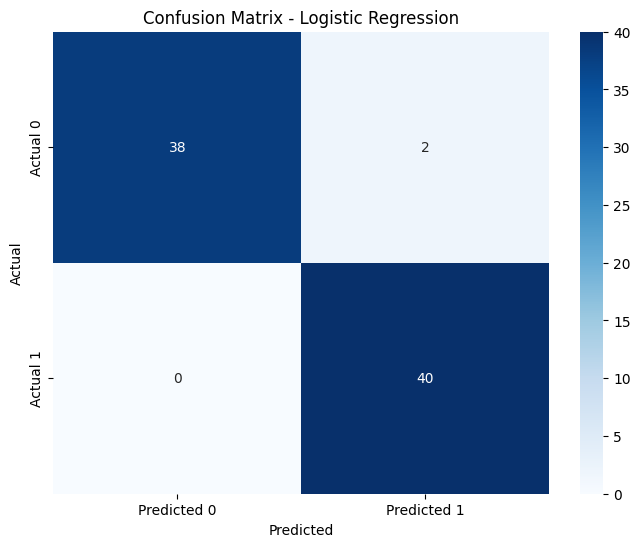

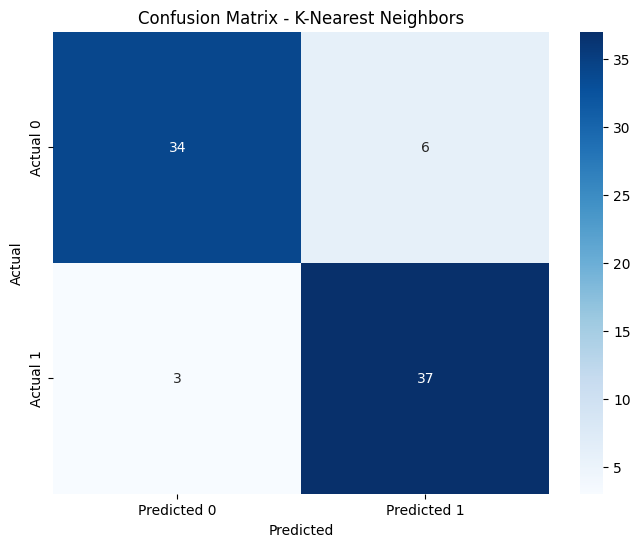

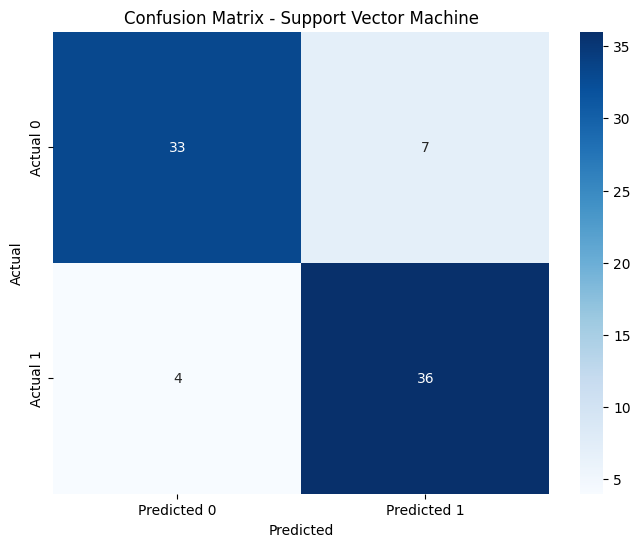

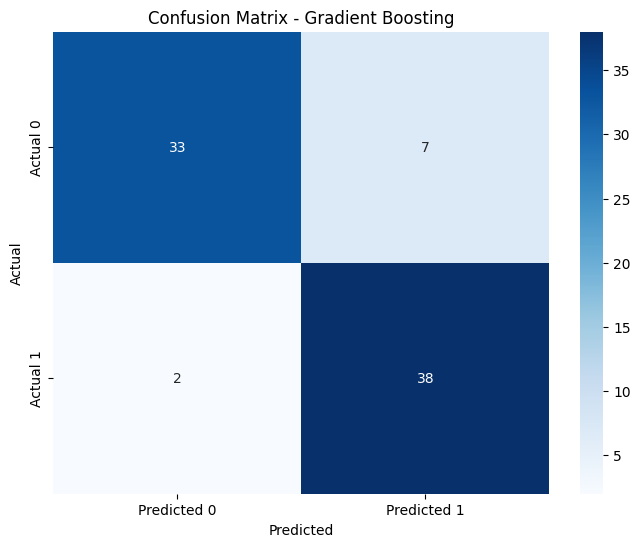

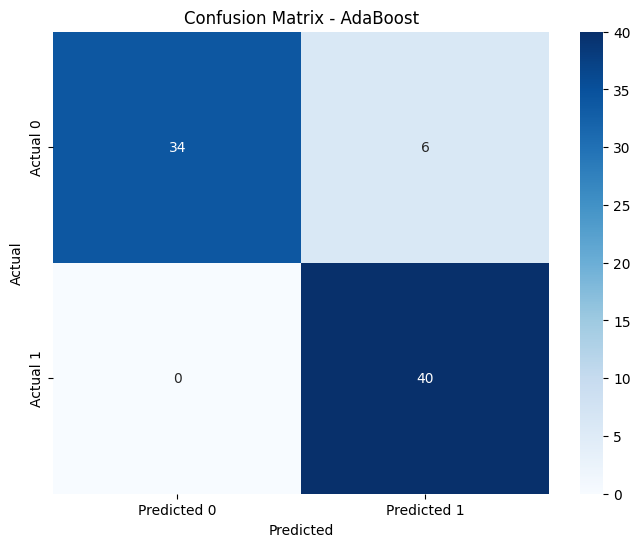

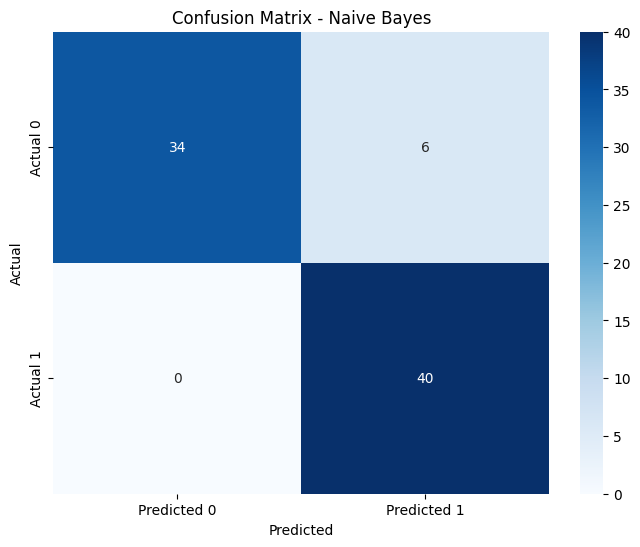

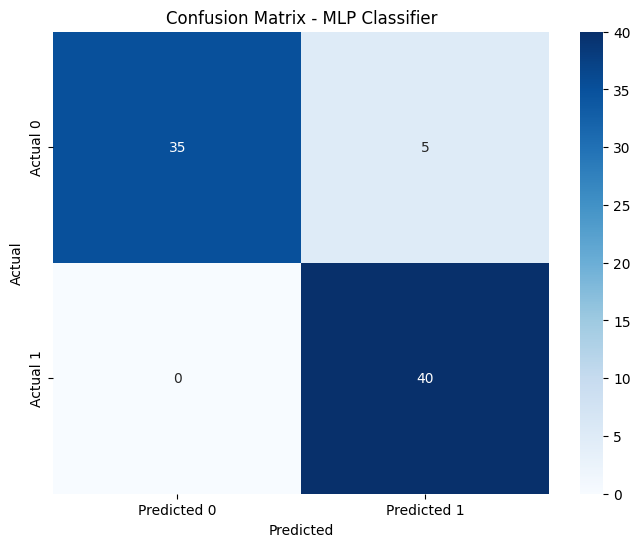

In [12]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    try:
        # Predict on the test set
        y_pred = model.predict(x_test)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
    except Exception as e:
        print(f"Error with model {name}: {e}")


## **Confusion Matrices for Train, Test, and Validation for a specific model(Multi Layer Perceptron)**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


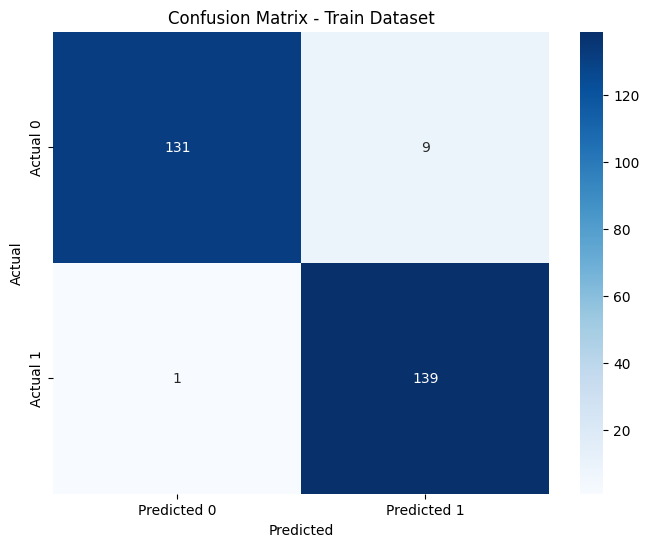

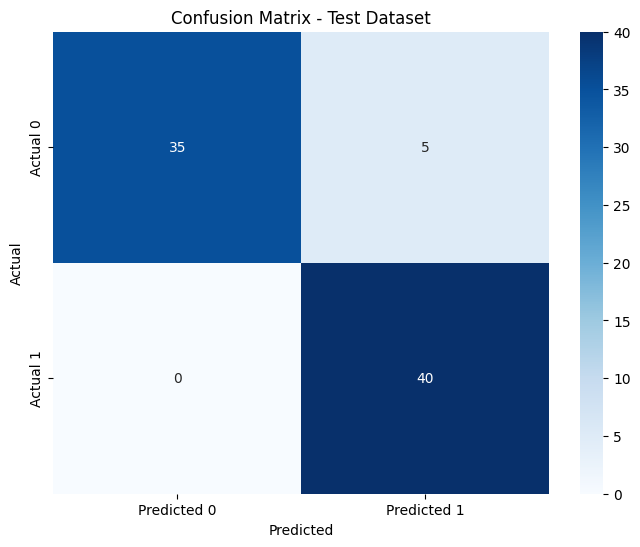

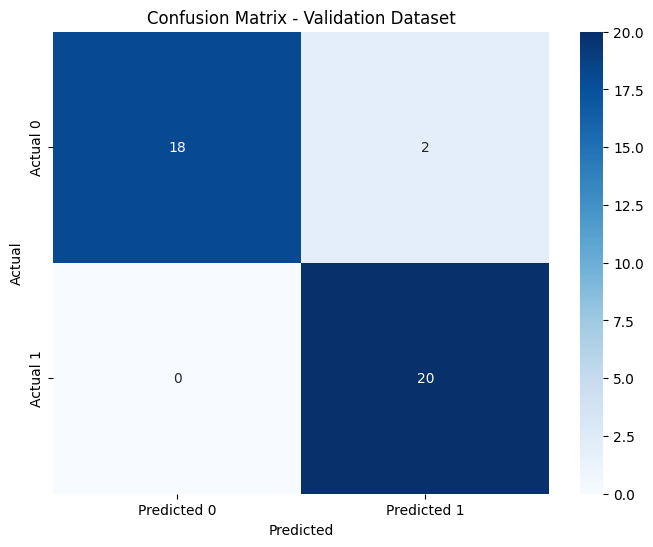

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Select a model to demonstrate, e.g., Decision Tree
model = models['MLP Classifier']
model.fit(x_train, y_train)  # Train the model

# Predictions for Train, Test, and Validation
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_valid_pred = model.predict(x_valid)

# Plot confusion matrices
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix - Train Dataset')
plot_confusion_matrix(y_test, y_test_pred, 'Confusion Matrix - Test Dataset')
plot_confusion_matrix(y_valid, y_valid_pred, 'Confusion Matrix - Validation Dataset')


# **Bar Diagrams for Model Comparison with accuracy for Train ,Test and Validation**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


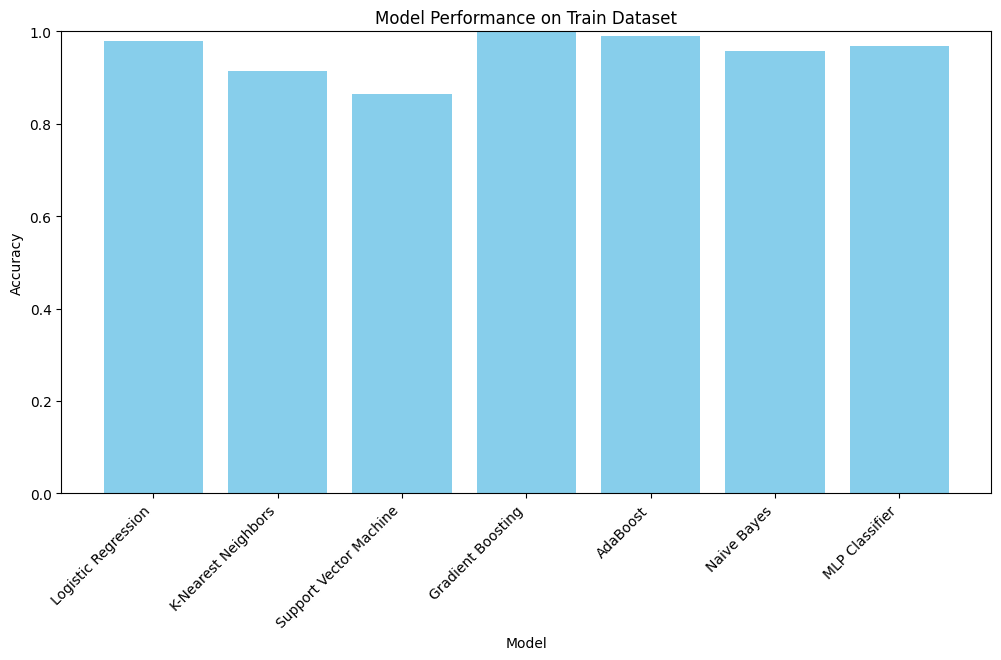

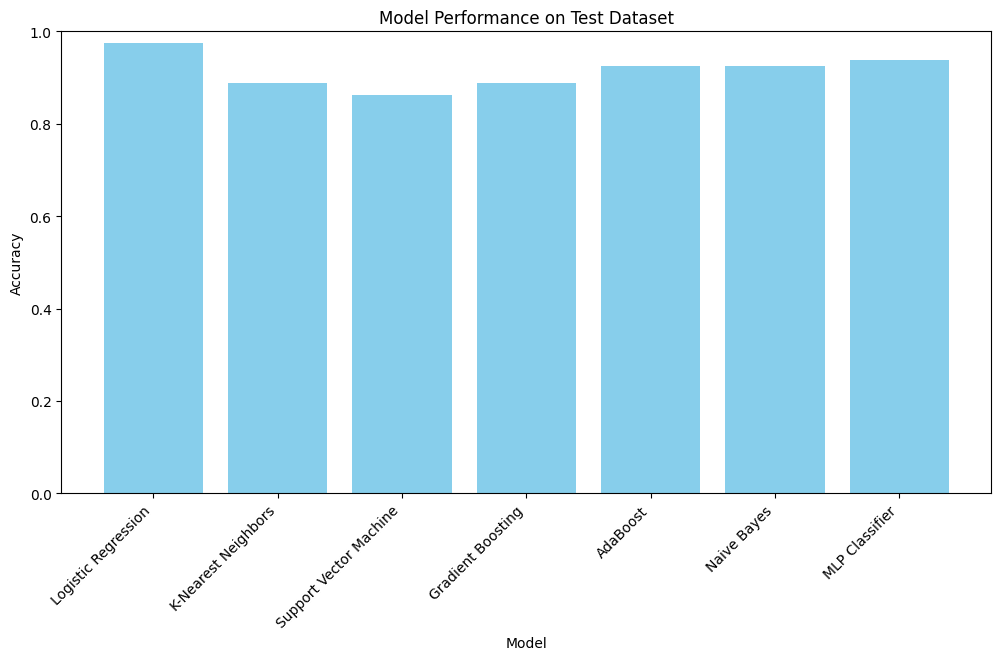

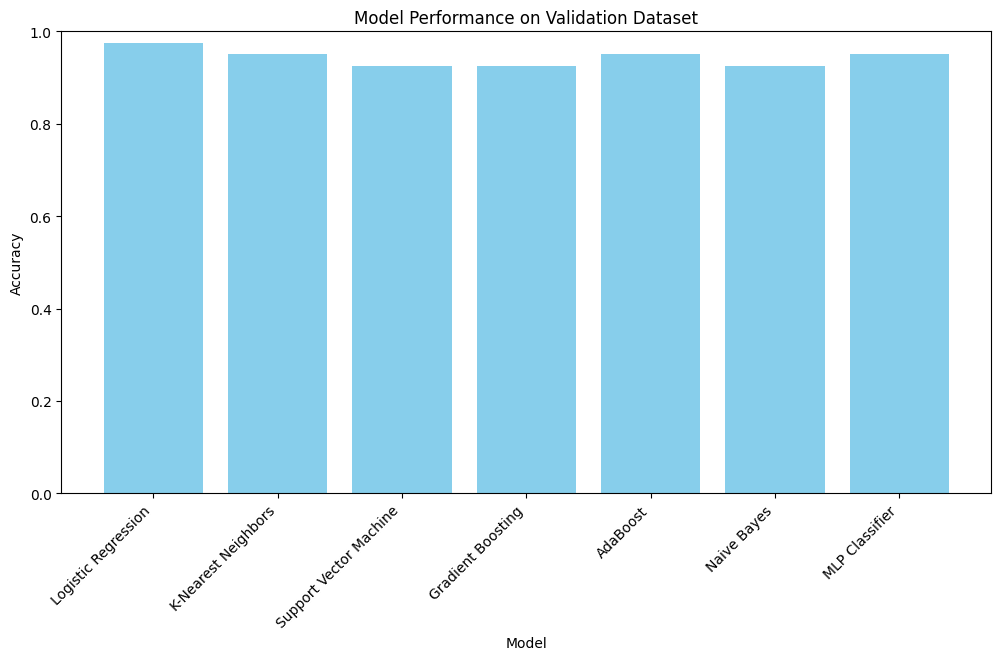

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionaries for results
results_train = {'Model': [], 'Accuracy': []}
results_test = {'Model': [], 'Accuracy': []}
results_valid = {'Model': [], 'Accuracy': []}

# Iterate through models
for name, model in models.items():
    try:
        # Train the model
        model.fit(x_train, y_train)

        # Predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        y_valid_pred = model.predict(x_valid)

        # Accuracy for train, test, and validation
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)

        # Append results
        results_train['Model'].append(name)
        results_train['Accuracy'].append(train_accuracy)

        results_test['Model'].append(name)
        results_test['Accuracy'].append(test_accuracy)

        results_valid['Model'].append(name)
        results_valid['Accuracy'].append(valid_accuracy)
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Convert results to DataFrames
train_df = pd.DataFrame(results_train)
test_df = pd.DataFrame(results_test)
valid_df = pd.DataFrame(results_valid)

# Plotting
def plot_model_performance(df, dataset_name):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Model'], df['Accuracy'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Model Performance on {dataset_name} Dataset')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.show()

# Train Performance
plot_model_performance(train_df, 'Train')

# Test Performance
plot_model_performance(test_df, 'Test')

# Validation Performance
plot_model_performance(valid_df, 'Validation')


## **Radar Chart**
## **Best fitted model is indicated by which located near to the perimeter of the circle**

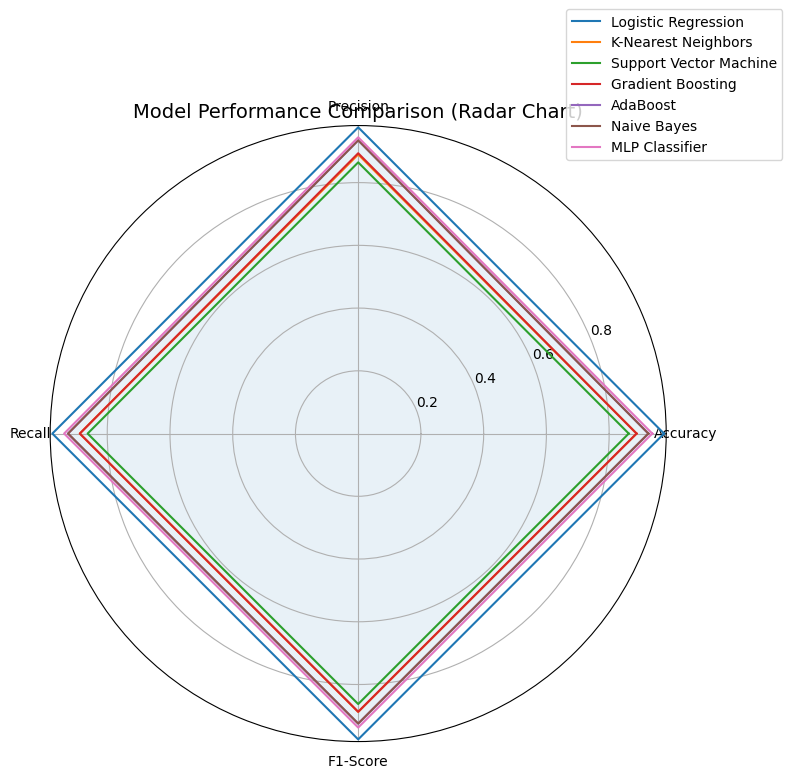

In [15]:
from math import pi

# Prepare data for radar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models_to_visualize = results_test['Model']  # List of model names
data = {metric: [] for metric in metrics}

for name, model in models.items():
    try:
        y_pred = model.predict(x_test)
        data['Accuracy'].append(accuracy_score(y_test, y_pred))
        data['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=1))
        data['Recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=1))
        data['F1-Score'].append(f1_score(y_test, y_pred, average='weighted', zero_division=1))
    except:
        pass

# Add model names to data
data['Model'] = models_to_visualize

# Radar chart
plt.figure(figsize=(10, 8))
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Close the loop

for i, name in enumerate(data['Model']):
    values = [data[metric][i] for metric in metrics]
    values += values[:1]  # Close the loop
    plt.polar(angles, values, label=name)

plt.xticks(angles[:-1], metrics, color='black', size=10)
plt.fill(angles, values, alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.title('Model Performance Comparison (Radar Chart)', size=14)
plt.show()


## **ROC Curve: ROC Curve show all model performance in  a single diagram**

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the individual models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
ada = AdaBoostClassifier()
nb = GaussianNB()
mlp = MLPClassifier(max_iter=100)

# Create a VotingClassifier (hard voting) - Majority voting
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('ada', ada),
    ('mlp', mlp)
], voting='hard')

# Fit the Voting Classifier on the training data
voting_clf.fit(x_train, y_train)

# Evaluate the model on the training, testing, and validation sets
def evaluate_model(model, X_train, y_train, X_test, y_test, X_valid, y_valid):
    # Training evaluation
    y_train_pred = model.predict(X_train)
    results_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
    }

    # Testing evaluation
    y_test_pred = model.predict(X_test)
    results_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
    }

    # Validation evaluation
    y_valid_pred = model.predict(X_valid)
    results_valid = {
        'Accuracy': accuracy_score(y_valid, y_valid_pred),
        'Precision': precision_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_valid, y_valid_pred, average='weighted', zero_division=1)
    }

    return results_train, results_test, results_valid

# Evaluate the Voting Classifier
train_results, test_results, valid_results = evaluate_model(voting_clf, x_train, y_train, x_test, y_test, x_valid, y_valid)

# Print results
print("Training Results:", train_results)
print("Testing Results:", test_results)
print("Validation Results:", valid_results)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Results: {'Accuracy': 0.975, 'Precision': 0.9761904761904762, 'Recall': 0.975, 'F1-Score': 0.9749843652282676}
Testing Results: {'Accuracy': 0.95, 'Precision': 0.9545454545454545, 'Recall': 0.95, 'F1-Score': 0.949874686716792}
Validation Results: {'Accuracy': 0.975, 'Precision': 0.9761904761904763, 'Recall': 0.975, 'F1-Score': 0.9749843652282676}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base models
base_learners = [
    ('logreg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('ada', AdaBoostClassifier()),
    ('mlp', MLPClassifier(max_iter=1000))
]

# Define the meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit the Stacking Classifier on the training data
stacking_clf.fit(x_train, y_train)

# Evaluate the Stacking Classifier
def evaluate_model(model, X_train, y_train, X_test, y_test, X_valid, y_valid):
    # Training evaluation
    y_train_pred = model.predict(X_train)
    results_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
    }

    # Testing evaluation
    y_test_pred = model.predict(X_test)
    results_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
    }

    # Validation evaluation
    y_valid_pred = model.predict(X_valid)
    results_valid = {
        'Accuracy': accuracy_score(y_valid, y_valid_pred),
        'Precision': precision_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_valid, y_valid_pred, average='weighted', zero_division=1)
    }

    return results_train, results_test, results_valid

# Evaluate the Stacking Classifier
train_results, test_results, valid_results = evaluate_model(stacking_clf, x_train, y_train, x_test, y_test, x_valid, y_valid)

# Print results
print("Training Results:", train_results)
print("Testing Results:", test_results)
print("Validation Results:", valid_results)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training Results: {'Accuracy': 0.9928571428571429, 'Precision': 0.9929577464788731, 'Recall': 0.9928571428571429, 'F1-Score': 0.9928567784070614}
Testing Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
Validation Results: {'Accuracy': 0.975, 'Precision': 0.9761904761904763, 'Recall': 0.975, 'F1-Score': 0.9749843652282676}


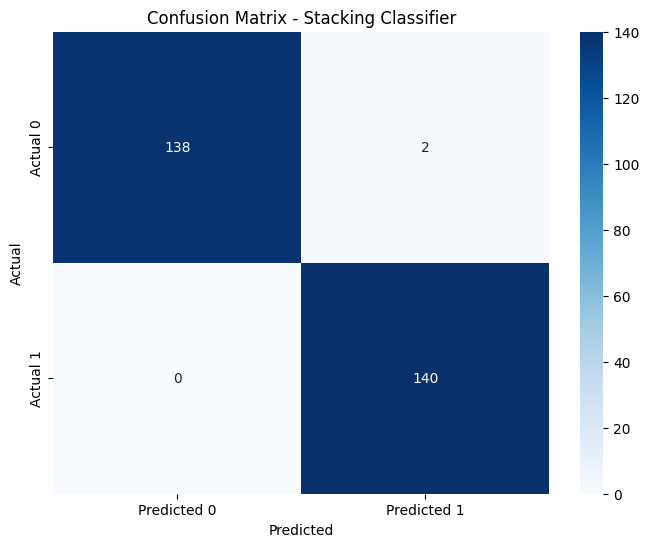

In [28]:
# prompt: give confusion matrix for staking

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'stacking_clf' and 'x_test', 'y_test' are defined from the previous code
y_pred = stacking_clf.predict(x_train)
cm = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


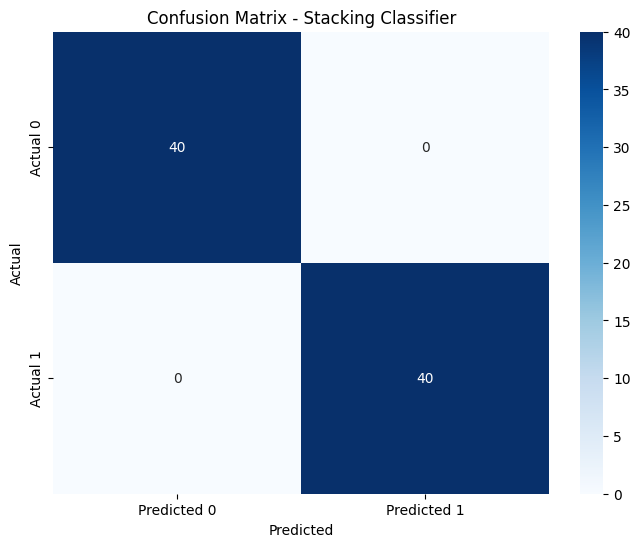

In [29]:
# prompt: give confusion matrix for staking

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'stacking_clf' and 'x_test', 'y_test' are defined from the previous code
y_pred = stacking_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


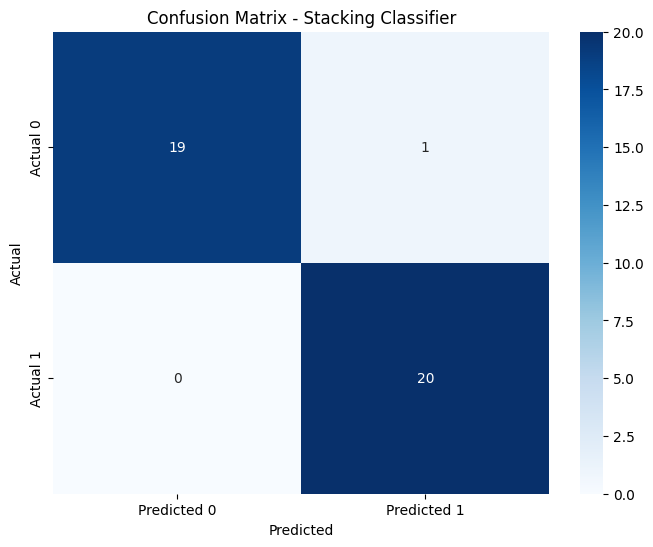

In [23]:
# prompt: give confusion matrix for staking

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'stacking_clf' and 'x_test', 'y_test' are defined from the previous code
y_pred = stacking_clf.predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


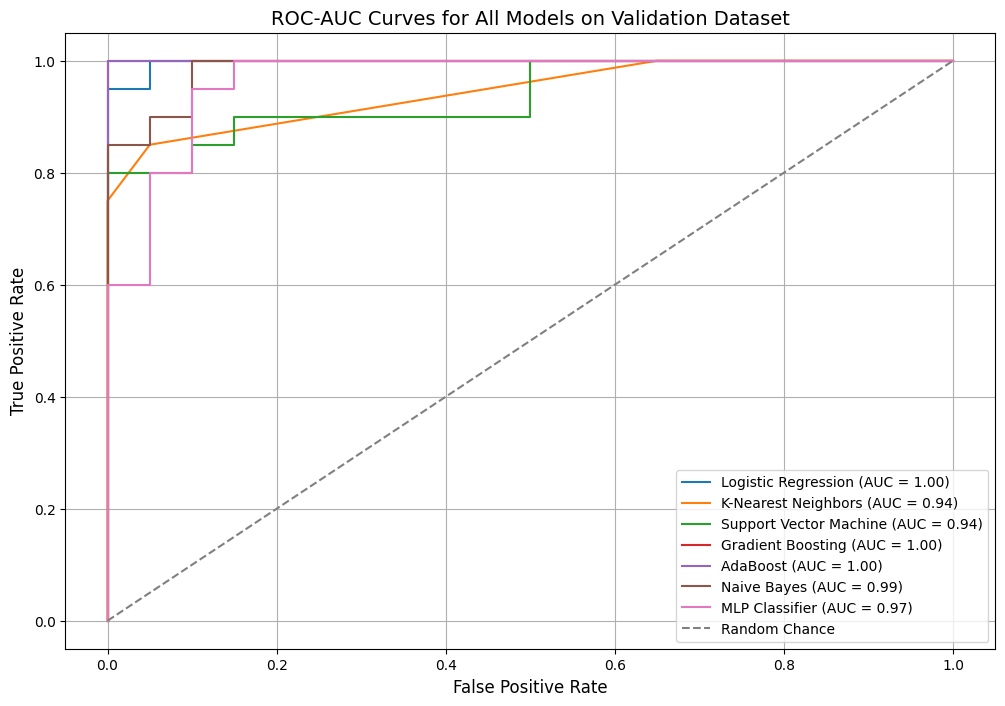


AUC Scores on Validation Dataset:
Logistic Regression: AUC = 1.00
K-Nearest Neighbors: AUC = 0.94
Support Vector Machine: AUC = 0.94
Gradient Boosting: AUC = 1.00
AdaBoost: AUC = 1.00
Naive Bayes: AUC = 0.99
MLP Classifier: AUC = 0.97


In [30]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a dictionary to store ROC-AUC scores
roc_auc_scores_valid = {}

# Assuming 'models', 'x_valid', and 'y_valid' are defined from the previous code

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for name, model in models.items():
    try:
        # Predict probabilities for the positive class
        if hasattr(model, "predict_proba"):
            y_scores_valid = model.predict_proba(x_valid)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores_valid = model.decision_function(x_valid)
        else:
            continue  # Skip models without predict_proba or decision_function

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_valid, y_scores_valid)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores_valid[name] = roc_auc

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Error with model {name}: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Final plot adjustments
plt.title('ROC-AUC Curves for All Models on Validation Dataset', size=14)
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

# Display AUC scores
print("\nAUC Scores on Validation Dataset:")
for name, auc_score in roc_auc_scores_valid.items():
    print(f"{name}: AUC = {auc_score:.2f}")
